In [125]:
import pandas as pd
df = pd.read_csv("Downloads/adult.data")

In [126]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
             'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','over50k']

In [127]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over50k
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [128]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education-num     32560 non-null int64
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null int64
capital-loss      32560 non-null int64
hours-per-week    32560 non-null int64
native-country    32560 non-null object
over50k           32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [130]:
(df == ' ?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
over50k              0
dtype: int64

In [131]:
import numpy as np
df[['workclass', 'occupation', 'native-country']] = df[['workclass', 'occupation', 'native-country']].replace(' ?', np.nan)

In [132]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
over50k              0
dtype: int64

In [133]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [134]:
df['over50k'] = df['over50k'].map({' <=50K':0, ' >50K':1})

In [135]:
X = df.drop('over50k', axis=1)
y = df['over50k']

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#creating copies of data to be used later
X_train_c, X_test_c, y_train_c, y_test_c = X_train, X_test, y_train, y_test

In [137]:
over50K_num = df.select_dtypes(include=[np.number])
over50K_cat = df[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]


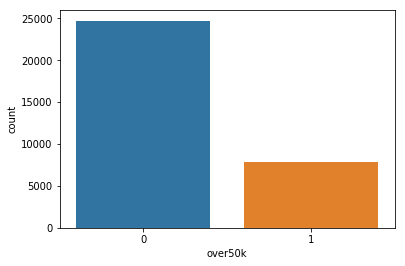

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['over50k'], label='Count')
plt.show()

In [139]:
over50K_num.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'over50k'],
      dtype='object')

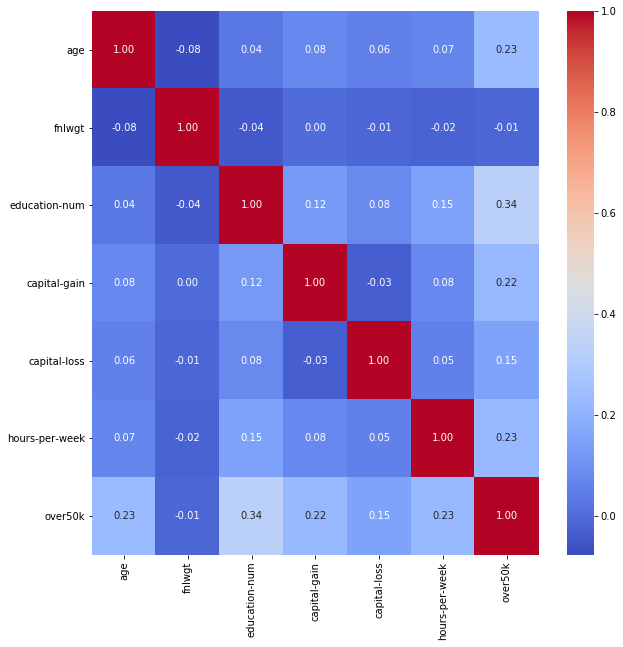

In [140]:
plt.figure(figsize=(10,10))
g = sns.heatmap(df[over50K_num.columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")

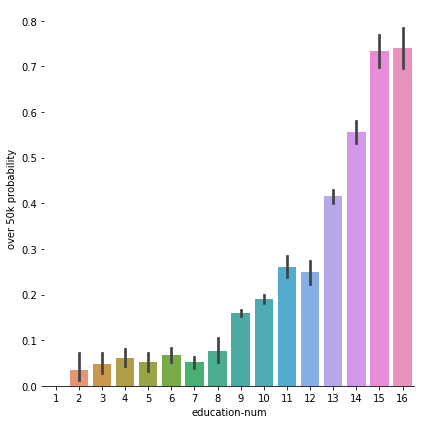

In [141]:
g = sns.factorplot(x='education-num', y='over50k', kind='bar', size=6, data=df)
g.despine(left=True)

g = g.set_ylabels("over 50k probability")


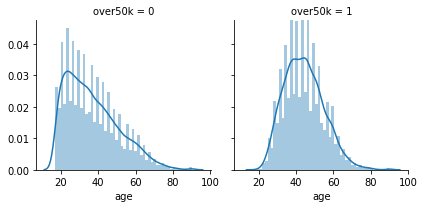

In [142]:

g = sns.FacetGrid(df, col='over50k')
g = g.map(sns.distplot, "age")


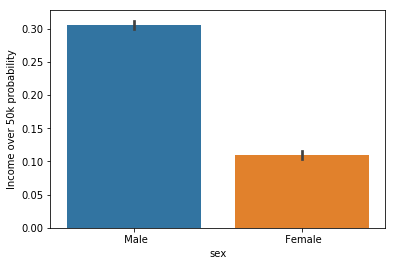

In [143]:
g = sns.barplot(x='sex', y='over50k', data=df)
g = g.set_ylabel('Income over 50k probability')

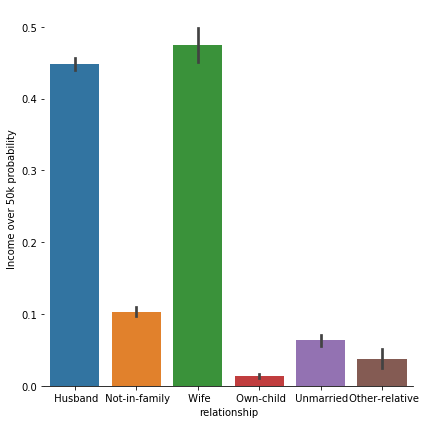

In [144]:
g = sns.factorplot(x='relationship', y='over50k', data=df, kind='bar', size=6)
g.despine(left=True)
g = g.set_ylabels("Income over 50k probability")

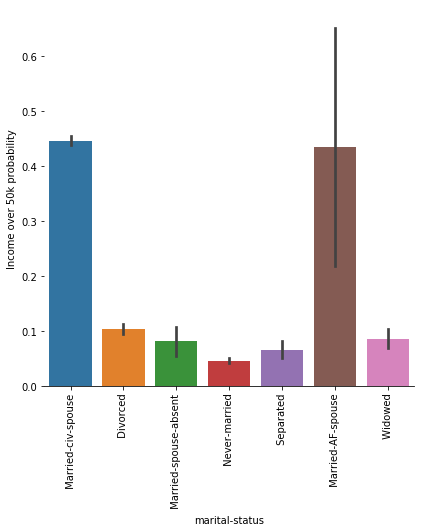

In [145]:
g = sns.factorplot(x='marital-status', y='over50k', data=df, kind='bar', size=6)
g.despine(left=True)
g = g.set_ylabels("Income over 50k probability")
g.set_xticklabels(rotation=90)

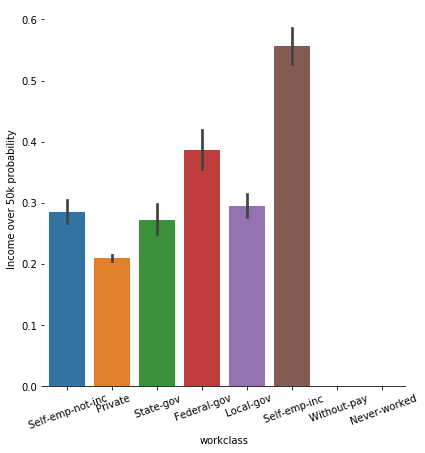

In [146]:
g = sns.factorplot(x="workclass", y='over50k', data=df, size=6, kind='bar')
g.despine(left=True)
g = g.set_ylabels("Income over 50k probability")
g.set_xticklabels(rotation=20)

In [147]:
df = X_train

In [148]:
df_labels = y_train

In [149]:
from sklearn.preprocessing import LabelEncoder
from future_encoders import OrdinalEncoder

In [150]:

ordinal_encoder = OrdinalEncoder()
over50K_cat_encoded = ordinal_encoder.fit_transform(over50K_cat.astype(str))
over50K_cat_encoded[:10]



array([[ 5.,  9.,  2.,  3.,  0.,  4.,  1., 38.],
       [ 3., 11.,  0.,  5.,  1.,  4.,  1., 38.],
       [ 3.,  1.,  2.,  5.,  0.,  2.,  1., 38.],
       [ 3.,  9.,  2.,  9.,  5.,  2.,  0.,  4.],
       [ 3., 12.,  2.,  3.,  5.,  4.,  0., 38.],
       [ 3.,  6.,  3.,  7.,  1.,  2.,  0., 22.],
       [ 5., 11.,  2.,  3.,  0.,  4.,  1., 38.],
       [ 3., 12.,  4.,  9.,  1.,  4.,  0., 38.],
       [ 3.,  9.,  2.,  3.,  0.,  4.,  1., 38.],
       [ 3., 15.,  2.,  3.,  0.,  2.,  1., 38.]])

In [151]:
ordinal_encoder.categories_

[array([' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
        ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
       dtype=object),
 array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object),
 array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
        ' Married-spouse-absent', ' Never-married', ' Separated',
        ' Widowed'], dtype=object),
 array([' Adm-clerical', ' Armed-Forces', ' Craft-repair',
        ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
        ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
        ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
        ' Transport-moving'], dtype=object),
 array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
        ' Unmarried', ' Wife'], 

In [152]:
over50K_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 8 columns):
workclass         32560 non-null object
education         32560 non-null object
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
native-country    32560 non-null object
dtypes: object(8)
memory usage: 2.0+ MB


In [153]:
label_encoder = LabelEncoder()
over50K_cat_encoded = over50K_cat.apply(LabelEncoder().fit_transform)
over50K_cat_encoded[:10]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,2,3,0,4,1,38
1,3,11,0,5,1,4,1,38
2,3,1,2,5,0,2,1,38
3,3,9,2,9,5,2,0,4
4,3,12,2,3,5,4,0,38
5,3,6,3,7,1,2,0,22
6,5,11,2,3,0,4,1,38
7,3,12,4,9,1,4,0,38
8,3,9,2,3,0,4,1,38
9,3,15,2,3,0,2,1,38


In [154]:
from future_encoders import ColumnTransformer
over50K_num = df.select_dtypes(include=[np.number])
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(over50K_num)
imputer.statistics_

array([3.70000e+01, 1.78497e+05, 1.00000e+01, 0.00000e+00, 0.00000e+00,
       4.00000e+01])

In [155]:
over50K_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
21385,32,732102,13,0,0,40
19749,23,72887,9,0,0,1
1216,33,163003,9,0,0,41
30048,56,187873,14,0,0,40
23077,50,43764,16,15024,0,50


In [156]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

over50K_num_tr = num_pipeline.fit_transform(over50K_num)

In [157]:
over50K_num_tr

array([[-4.77364846e-01,  5.12249672e+00,  1.14556780e+00,
        -1.45826491e-01, -2.18064925e-01, -3.75149396e-02],
       [-1.13501110e+00, -1.10231572e+00, -4.16092042e-01,
        -1.45826491e-01, -2.18064925e-01, -3.17956522e+00],
       [-4.04293040e-01, -2.51371490e-01, -4.16092042e-01,
        -1.45826491e-01, -2.18064925e-01,  4.30504523e-02],
       ...,
       [ 3.26425016e-01,  1.81627988e-02, -4.16092042e-01,
        -1.45826491e-01, -2.18064925e-01, -3.75149396e-02],
       [-1.28115471e+00,  3.18489945e-01, -4.16092042e-01,
         1.67684476e-04, -2.18064925e-01, -8.43168859e-01],
       [-8.42723873e-01,  4.42379024e-01,  1.14556780e+00,
        -1.45826491e-01, -2.18064925e-01, -3.75149396e-02]])

In [158]:
from future_encoders import OneHotEncoder, ColumnTransformer

cat_pipeline = Pipeline([
    ('1hot', OneHotEncoder()),
    #('ordinal', OrdinalEncoder()),
    ('imputer', Imputer(strategy='most_frequent'))
    
])

over50K_cat_tr = cat_pipeline.fit_transform(over50K_cat.astype(str))

In [159]:
over50K_cat_tr

<32560x99 sparse matrix of type '<class 'numpy.float64'>'
	with 260480 stored elements in Compressed Sparse Column format>

In [160]:

num_attribs = list(over50K_num)
cat_attribs = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        #("cat", OneHotEncoder(), cat_attribs),
        ('cat', cat_pipeline, cat_attribs)
    ])

over50K_prepared = full_pipeline.fit_transform(df)



In [161]:
over50K_prepared

<22792x105 sparse matrix of type '<class 'numpy.float64'>'
	with 319088 stored elements in Compressed Sparse Row format>

In [162]:
over50K_prepared.shape

(22792, 105)

In [163]:
X_test_prepared = full_pipeline.transform(X_test)

In [164]:
X_test_prepared.shape

(9768, 105)

In [165]:
list(over50K_num)

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [166]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(over50K_prepared, df_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [167]:
log_reg.score(over50K_prepared, df_labels)

0.8528431028431028

In [168]:
from sklearn.metrics import accuracy_score, roc_auc_score

final_predictions = log_reg.predict(X_test_prepared)
print("Test set Accuracy: {}".format(accuracy_score(y_test, final_predictions)))
print("Test set AUC: {}".format(roc_auc_score(y_test, log_reg.predict_proba(X_test_prepared)[:,1])))

Test set Accuracy: 0.8501228501228502
Test set AUC: 0.9040494724998126


In [169]:
from sklearn.metrics import confusion_matrix
confusion_matrix(final_predictions, y_test)

array([[6873,  942],
       [ 522, 1431]])

In [170]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8)
dt.fit(over50K_prepared, df_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [171]:
dt.score(over50K_prepared, df_labels)

0.8612671112671113

In [172]:
#cross validation testing
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, over50K_prepared, df_labels, scoring="accuracy", cv=10)

In [173]:
scores

array([0.85131579, 0.84868421, 0.86710526, 0.85219298, 0.85870996,
       0.84379114, 0.84993418, 0.85476086, 0.84328358, 0.85908692])

In [174]:
scores.mean()

0.8528864884710323

In [175]:
final_predictions = dt.predict(X_test_prepared)
print("Test set Accuracy: {}".format(accuracy_score(final_predictions, y_test)))
print("Test set AUC: {}".format(roc_auc_score(y_test, dt.predict_proba(X_test_prepared)[:,1])))

Test set Accuracy: 0.8530917280917281
Test set AUC: 0.8984138381219641


In [176]:
confusion_matrix(final_predictions, y_test)

array([[7043, 1083],
       [ 352, 1290]])

In [177]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_features=3, min_samples_leaf=5)
rf_model.fit(over50K_prepared, df_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [178]:
rf_model.score(over50K_prepared, df_labels)

0.84498946998947

In [179]:
final_predictions = rf_model.predict(X_test_prepared)

print("Test set accuracy: {}".format(rf_model.score(X_test_prepared, y_test)))
print("Test set AUC: {}".format(roc_auc_score(y_test, rf_model.predict_proba(X_test_prepared)[:,1])))

Test set accuracy: 0.8382473382473382
Test set AUC: 0.8965997058980241


In [180]:
confusion_matrix(y_test, final_predictions)

array([[7095,  300],
       [1280, 1093]])

In [181]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[100], 'max_features':[6,8]},
]

forest_clf = RandomForestClassifier()

grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(over50K_prepared, df_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [100], 'max_features': [6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [182]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [183]:


final_predictions = grid_search.best_estimator_.predict(X_test_prepared)
print("Test set Accuracy: {}".format(accuracy_score(final_predictions, y_test)))
print("Test set AUC: {}".format(roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test_prepared)[:,1])))

Test set Accuracy: 0.8548321048321048
Test set AUC: 0.9029351787505765


In [184]:
rf_many_trees = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [185]:
rf_many_trees.fit(over50K_prepared, df_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [186]:


final_predictions = rf_many_trees.predict(X_test_prepared)
print("Test set Accuracy: {}".format(accuracy_score(final_predictions, y_test)))
print("Test set AUC: {}".format(roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test_prepared)[:,1])))

Test set Accuracy: 0.8554463554463555
Test set AUC: 0.9029351787505765


In [187]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(over50K_prepared, df_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [188]:
svm_model.score(over50K_prepared, df_labels)

0.8531502281502281

In [189]:
final_predictions = svm_model.predict(X_test_prepared)
print("Test set Accuracy: {}".format(accuracy_score(final_predictions, y_test)))
#print("AUC: {}".format(roc_auc_score(y_test, svm_model.predict_proba(X_test_prepared)[:,1])))

Test set Accuracy: 0.8501228501228502


In [190]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(n_estimators=800)
gbm_model.fit(over50K_prepared, df_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=800,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [191]:
gbm_model.score(over50K_prepared, df_labels)

0.8973323973323973

In [192]:
final_predictions = gbm_model.predict(X_test_prepared)
print("Test set Accuracy: {}".format(accuracy_score(final_predictions, y_test)))
print("Test set AUC: {}".format(roc_auc_score(y_test, gbm_model.predict_proba(X_test_prepared)[:,1])))

Test set Accuracy: 0.8721334971334971
Test set AUC: 0.9264205122594253


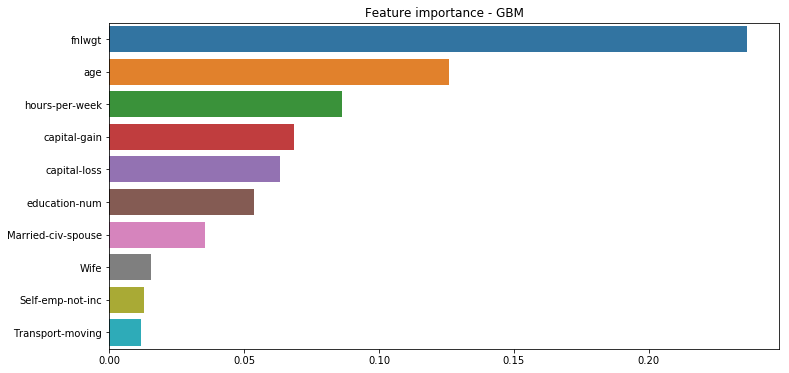

In [193]:
feature_importances = gbm_model.feature_importances_


cat_encoder = full_pipeline.named_transformers_["cat"].named_steps['1hot']
cat_one_hot_attribs = []
for x in cat_encoder.categories_:
    x = list(x)
    for attr in x:
        cat_one_hot_attribs.append(attr.strip())
    
attributes = num_attribs + cat_one_hot_attribs
feat_imp = sorted(zip(feature_importances, attributes), reverse=True)

x_val = [x[1] for x in feat_imp[:10]]
y_val = [x[0] for x in feat_imp[:10]]

plt.figure(figsize=(12,6))
sns.barplot(y_val,x_val)
plt.title("Feature importance - GBM")
plt.show()

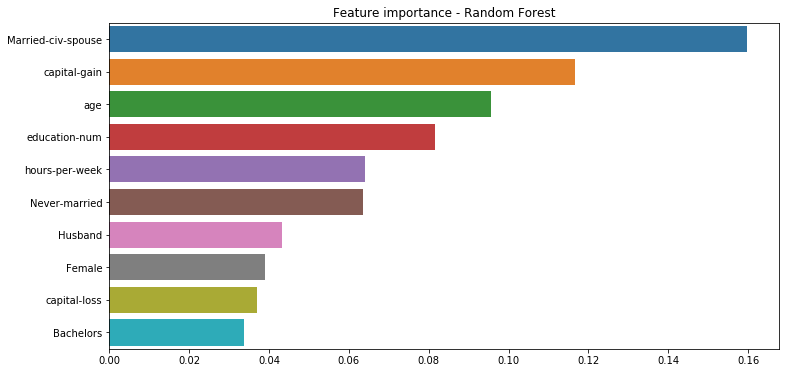

In [194]:
feature_importances = rf_model.feature_importances_

cat_encoder = full_pipeline.named_transformers_["cat"].named_steps['1hot']
cat_one_hot_attribs = []
for x in cat_encoder.categories_:
    x = list(x)
    for attr in x:
        cat_one_hot_attribs.append(attr.strip())
    
attributes = num_attribs + cat_one_hot_attribs
feat_imp = sorted(zip(feature_importances, attributes), reverse=True)

x_val = [x[1] for x in feat_imp[:10]]
y_val = [x[0] for x in feat_imp[:10]]

plt.figure(figsize=(12,6))
sns.barplot(y_val,x_val)
plt.title("Feature importance - Random Forest")
plt.show()

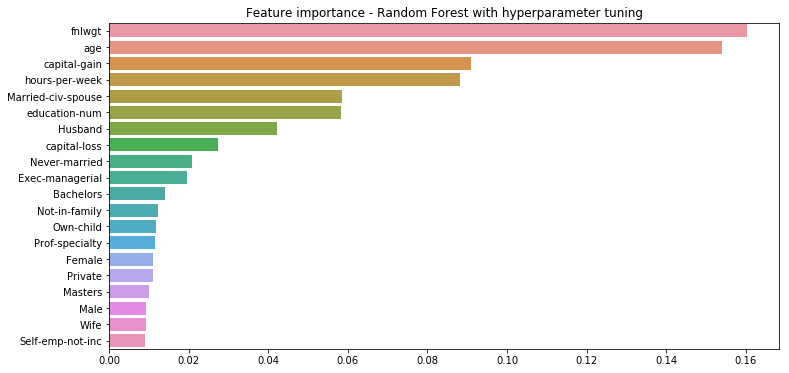

In [198]:
feature_importances = grid_search.best_estimator_.feature_importances_

cat_encoder = full_pipeline.named_transformers_["cat"].named_steps['1hot']
cat_one_hot_attribs = []
for x in cat_encoder.categories_:
    x = list(x)
    for attr in x:
        cat_one_hot_attribs.append(attr.strip())
    
attributes = num_attribs + cat_one_hot_attribs
feat_imp = sorted(zip(feature_importances, attributes), reverse=True)

x_val = [x[1] for x in feat_imp[:20]]
y_val = [x[0] for x in feat_imp[:20]]

plt.figure(figsize=(12,6))
sns.barplot(y_val,x_val)
plt.title("Feature importance - Random Forest with hyperparameter tuning")
plt.show()

In [199]:
from sklearn.svm import SVC

svc_clf = SVC(kernel='linear', class_weight='balanced', probability=True)

In [200]:
svc_clf.fit(over50K_prepared, df_labels)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [201]:
final_predictions = svc_clf.predict(X_test_prepared)
print(accuracy_score(final_predictions, y_test))

print("AUC: {}".format(roc_auc_score(y_test, svc_clf.predict_proba(X_test_prepared)[:,1])))

0.7886977886977887
AUC: 0.8976233927606238


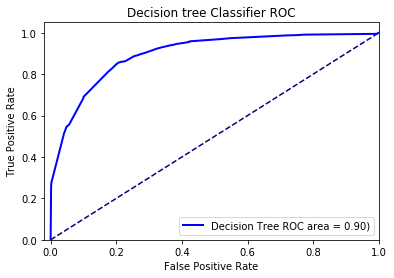

In [202]:

from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test_prepared)[:,1])
roc_auc = auc(fpr, tpr)

#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Decision tree Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='Decision Tree ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

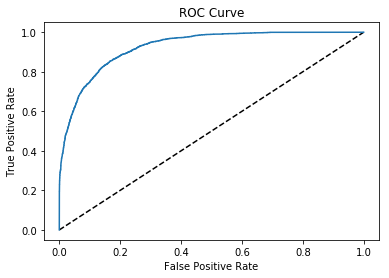

In [203]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = gbm_model.predict_proba(X_test_prepared)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [204]:
classifiers = {'Logistic regression':log_reg, 'Decision tree': dt, 'Random Forest': rf_model, 'GBM':gbm_model, 'SVM': svc_clf}

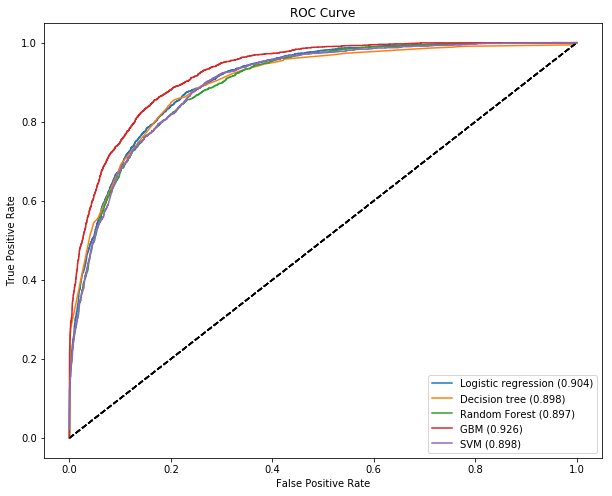

In [205]:
plt.figure(figsize=(10,8))
for name, model in classifiers.items():
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test_prepared)[:,1]
    

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=name+' (%0.3f)'  % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()   

In [206]:
gbrt = GradientBoostingClassifier(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(over50K_prepared , df_labels)
    y_pred = gbrt.predict(X_test_prepared)
    val_error = 1-accuracy_score(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [207]:
print(gbrt.n_estimators)

48


In [208]:
min_val_error

0.1442465192465192

In [209]:
gbm_model_2 = GradientBoostingClassifier(max_depth=2, random_state=42, n_estimators=48)
gbm_model_2.fit(over50K_prepared, y_train)

print(gbm_model_2.score(over50K_prepared, df_labels))
print(gbm_model_2.score(X_test_prepared, y_test))

0.8568796068796068
0.8555487305487306


### Early stopping with validation set

In [210]:
X_train_c.shape

(22792, 14)

In [214]:
X_test_c.shape

(9768, 14)

In [215]:
X_train_es = full_pipeline.fit_transform(X_train_c)

In [216]:
X_train_es.shape

(22792, 105)

In [217]:
#creating a validation set
X_train_es, X_val, y_train_es, y_val = train_test_split(X_train_es, y_train_c, test_size=0.5, random_state=42)

In [218]:
X_train_es.shape

(11396, 105)

In [219]:
X_val.shape

(11396, 105)

In [220]:
gbrt = GradientBoostingClassifier(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 180):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train_es , y_train_es)
    y_pred = gbrt.predict(X_val)
    val_error = 1-accuracy_score(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [221]:
print(gbrt.n_estimators)
print(min_val_error)

51
0.14224289224289222


In [222]:
print("Train set accuracy: {}".format(gbrt.score(X_train_es, y_train_es)))
print("Validation set accuracy: {}".format(gbrt.score(X_val, y_val)))
print("Test set accuracy: {}".format(gbrt.score(X_test_prepared, y_test_c)))

Train set accuracy: 0.8568796068796068
Validation set accuracy: 0.8576693576693577
Test set accuracy: 0.8556511056511057


In [223]:
# Test set accuracy of GBM model with 800 trees
gbm_model.score(X_test_prepared, y_test_c)

0.8721334971334971

In [224]:
confusion_matrix(y_val, y_pred)

array([[8282,  352],
       [1270, 1492]])

In [225]:
confusion_matrix(y_test_c, gbrt.predict(X_test_prepared))

array([[7077,  318],
       [1092, 1281]])

In [226]:
confusion_matrix(y_test_c, gbm_model.predict(X_test_prepared))

array([[6941,  454],
       [ 795, 1578]])

In [227]:
roc_auc_score(y_test, gbrt.predict_proba(X_test_prepared)[:,1])

0.9074299071678309

In [228]:
roc_auc_score(y_test, gbm_model.predict_proba(X_test_prepared)[:,1])

0.9264205122594253

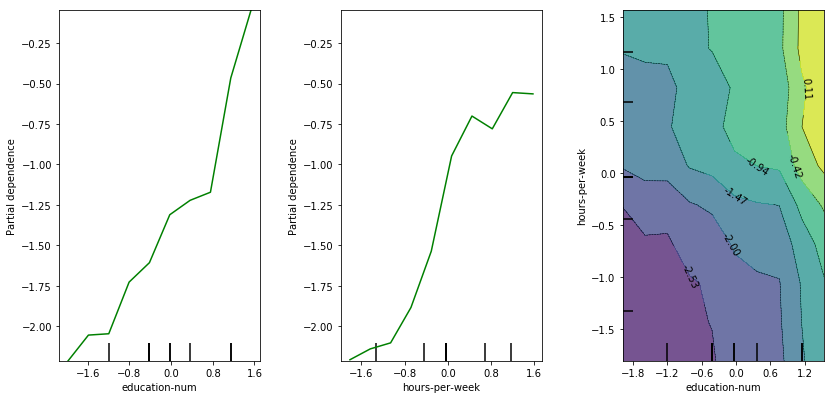

In [246]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

fig, axs = plot_partial_dependence(gbm_model, over50K_prepared.toarray(),feature_names=attributes, features=[(2),5, (2,5)], grid_resolution=10)

plt.subplots_adjust(top=0.9)
fig.set_size_inches(12.5, 6.5)

In [241]:
attributes.index('education-num')

2

In [243]:
attributes.index('hours-per-week')

5

In [244]:
attributes.index('Divorced')

30